In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

import scipy
import pywt
import mne

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
import glob
import os

In [66]:

fs = 128
data = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed_30Hz/15/eeg_motor_pre_15.mat')
start_idx = 40000
end_idx = 41000

In [67]:
#trim data
eeg_sub = data['trial_data'][37, start_idx:end_idx]
events_sv = data['events'][:, start_idx:end_idx]

#get keystrokes
events_arr = make_raw_events(events_sv)
t_keystrokes = clean_triggers(events_arr[events_arr[:, 2]==6]) #2 for audio or 6 for MIDI
keystroke_times = t_keystrokes[:, 0]/fs

#make time vector
n_times = eeg_sub.shape[0]
times = np.linspace(0, n_times/fs, n_times+1)[0:n_times]

In [68]:
cwtmatr, freqs, wavelet = morwav_trans(eeg_sub, 
                                       centerfreq = 1, 
                                       bandwidth = 1.5, 
                                       scale_values = [6,150,40])

In [69]:
t_keystrokes

array([[118,   0,   6],
       [226,   0,   6],
       [331,   0,   6],
       [435,   0,   6],
       [650,   0,   6],
       [838,   0,   6]])

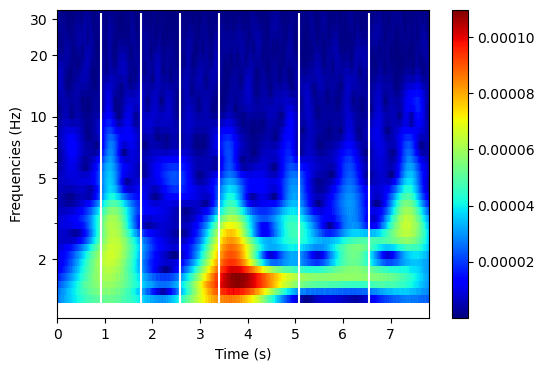

In [70]:
plot_scaleogram(cwtmatr, freqs, times)
plt.vlines(keystroke_times, 0,32, color = 'white')
#plt.ylim(10,32)